In [1]:
import pandas as pd

analysis_path = "../outputs/tables/analysis_df.csv.gz"
analysis_df = pd.read_csv(analysis_path)

analysis_df.shape


(300000, 15)

In [2]:
import numpy as np
import statsmodels.api as sm

# Features (drivers)
X = analysis_df[["years_since_review", "NumberSubmitters_num", "ConfidenceLevel", "conflicting"]].copy()

# Ensure numeric / boolean
X["years_since_review"] = pd.to_numeric(X["years_since_review"], errors="coerce")
X["NumberSubmitters_num"] = pd.to_numeric(X["NumberSubmitters_num"], errors="coerce")
X["ConfidenceLevel"] = pd.to_numeric(X["ConfidenceLevel"], errors="coerce")
X["conflicting"] = X["conflicting"].astype(int)

y = analysis_df["y"].astype(int)

# Drop missing rows (explicit and consistent)
mask = X.notna().all(axis=1) & y.notna()
Xc = sm.add_constant(X.loc[mask])
yc = y.loc[mask]

model = sm.Logit(yc, Xc).fit(disp=False)
model.summary()


ModuleNotFoundError: No module named 'statsmodels'

In [3]:
import numpy as np
import statsmodels.api as sm

# Features (drivers)
X = analysis_df[["years_since_review", "NumberSubmitters_num", "ConfidenceLevel", "conflicting"]].copy()

# Ensure numeric / boolean
X["years_since_review"] = pd.to_numeric(X["years_since_review"], errors="coerce")
X["NumberSubmitters_num"] = pd.to_numeric(X["NumberSubmitters_num"], errors="coerce")
X["ConfidenceLevel"] = pd.to_numeric(X["ConfidenceLevel"], errors="coerce")
X["conflicting"] = X["conflicting"].astype(int)

y = analysis_df["y"].astype(int)

# Drop missing rows (explicit and consistent)
mask = X.notna().all(axis=1) & y.notna()
Xc = sm.add_constant(X.loc[mask])
yc = y.loc[mask]

model = sm.Logit(yc, Xc).fit(disp=False)
model.summary()


ValueError: zero-size array to reduction operation maximum which has no identity

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

analysis_path = "../outputs/tables/analysis_df.csv.gz"
analysis_df = pd.read_csv(analysis_path)

X = analysis_df[["years_since_review", "NumberSubmitters_num", "ConfidenceLevel", "conflicting"]].copy()
X["years_since_review"] = pd.to_numeric(X["years_since_review"], errors="coerce")
X["NumberSubmitters_num"] = pd.to_numeric(X["NumberSubmitters_num"], errors="coerce")
X["ConfidenceLevel"] = pd.to_numeric(X["ConfidenceLevel"], errors="coerce")
X["conflicting"] = X["conflicting"].astype(int)

y = analysis_df["y"].astype(int)

mask = X.notna().all(axis=1) & y.notna()
Xc = sm.add_constant(X.loc[mask])
yc = y.loc[mask]

model = sm.Logit(yc, Xc).fit(disp=False)
model.summary()


ValueError: zero-size array to reduction operation maximum which has no identity

In [5]:
cols = ["years_since_review", "NumberSubmitters_num", "ConfidenceLevel", "conflicting", "y"]

print("DTYPES:")
print(analysis_df[cols].dtypes)

print("\nMISSING FRACTION:")
print(analysis_df[cols].isna().mean().sort_values(ascending=False))


DTYPES:
years_since_review      float64
NumberSubmitters_num      int64
ConfidenceLevel          object
conflicting                bool
y                         int64
dtype: object

MISSING FRACTION:
years_since_review      0.064563
NumberSubmitters_num    0.000000
ConfidenceLevel         0.000000
conflicting             0.000000
y                       0.000000
dtype: float64


In [6]:
# Ordinal encoding for ConfidenceLevel (biologically ordered)
conf_map = {
    "Low": 1,
    "Moderate": 2,
    "High": 3
}

analysis_df["ConfidenceLevel_num"] = analysis_df["ConfidenceLevel"].map(conf_map)

analysis_df["ConfidenceLevel"].value_counts(), analysis_df["ConfidenceLevel_num"].isna().mean()


(ConfidenceLevel
 High       131546
 Unknown     65643
 Low         53235
 Medium      49576
 Name: count, dtype: int64,
 np.float64(0.3840633333333333))

In [7]:
# Correct ordinal encoding for ConfidenceLevel (explicit + complete)
conf_map = {
    "Low": 1,
    "Unknown": 1,
    "Medium": 2,
    "Moderate": 2,   # safety in case both appear
    "High": 3
}

analysis_df["ConfidenceLevel_num"] = analysis_df["ConfidenceLevel"].map(conf_map)

analysis_df["ConfidenceLevel"].value_counts(), analysis_df["ConfidenceLevel_num"].isna().mean()


(ConfidenceLevel
 High       131546
 Unknown     65643
 Low         53235
 Medium      49576
 Name: count, dtype: int64,
 np.float64(0.0))

In [8]:
import statsmodels.api as sm

# Features (drivers) — now all numeric
X = analysis_df[
    ["years_since_review", "NumberSubmitters_num", "ConfidenceLevel_num", "conflicting"]
].copy()

X["years_since_review"] = pd.to_numeric(X["years_since_review"], errors="coerce")
X["NumberSubmitters_num"] = pd.to_numeric(X["NumberSubmitters_num"], errors="coerce")
X["ConfidenceLevel_num"] = pd.to_numeric(X["ConfidenceLevel_num"], errors="coerce")
X["conflicting"] = X["conflicting"].astype(int)

y = analysis_df["y"].astype(int)

# Drop rows with missing predictors
mask = X.notna().all(axis=1) & y.notna()
Xc = sm.add_constant(X.loc[mask])
yc = y.loc[mask]

model = sm.Logit(yc, Xc).fit(disp=False)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               280631
Model:                          Logit   Df Residuals:                   280626
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Jan 2026   Pseudo R-squ.:                  0.9033
Time:                        00:53:59   Log-Likelihood:                -15900.
converged:                       True   LL-Null:                   -1.6448e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6683      0.078     60.125      0.000       4.516       4.821
years_since_review       0.5855      0.005    123.279      0.000       0.576       0.595
NumberSubmitters_num    -0.6547      0.021    -30.742      0.000      -0.696      -0.613
ConfidenceLevel_num     -3.9669      0.038   -103.132      0.000      -4.042      -3.892
conflicting             -5.9154      0.083    -71.359      0.000      -6.078      -5.753
========================================================================================

Possibly complete quasi-separation: A fraction 0.39 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [9]:
# Build odds ratio table with confidence intervals
params = model.params
conf = model.conf_int()
conf.columns = ["ci_lower", "ci_upper"]

or_table = pd.concat(
    [
        params.rename("log_odds"),
        np.exp(params).rename("odds_ratio"),
        np.exp(conf["ci_lower"]).rename("or_ci_lower"),
        np.exp(conf["ci_upper"]).rename("or_ci_upper"),
    ],
    axis=1,
)

or_table = or_table.reset_index().rename(columns={"index": "feature"})

or_table


,feature,log_odds,odds_ratio,or_ci_lower,or_ci_upper
0,const,4.668349,106.521781,91.484551,124.030665
1,years_since_review,0.585535,1.795952,1.779310,1.812749
2,NumberSubmitters_num,-0.654734,0.519580,0.498338,0.541728
3,ConfidenceLevel_num,-3.966907,0.018932,0.017557,0.020414
4,conflicting,-5.915395,0.002698,0.002293,0.003174


In [10]:
out_csv = "../outputs/tables/evidence_driver_odds_ratios.csv"
or_table.to_csv(out_csv, index=False)
out_csv


'../outputs/tables/evidence_driver_odds_ratios.csv'

In [11]:
import matplotlib.pyplot as plt

# Exclude intercept for plotting
plot_df = or_table[or_table["feature"] != "const"].copy()

plot_df


,feature,log_odds,odds_ratio,or_ci_lower,or_ci_upper
1,years_since_review,0.585535,1.795952,1.779310,1.812749
2,NumberSubmitters_num,-0.654734,0.519580,0.498338,0.541728
3,ConfidenceLevel_num,-3.966907,0.018932,0.017557,0.020414
4,conflicting,-5.915395,0.002698,0.002293,0.003174


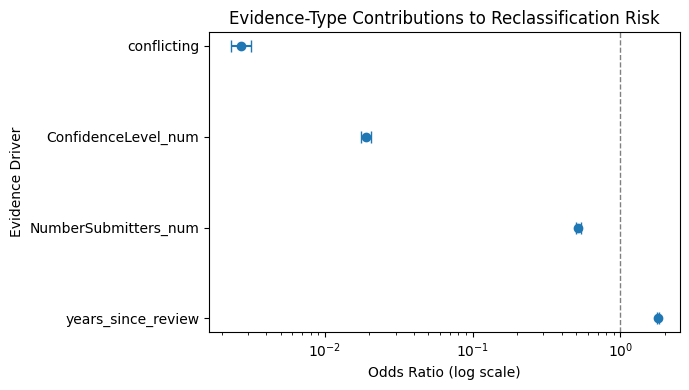

'../figures/evidence_driver_contributions.png'

In [12]:
plt.figure(figsize=(7, 4))

# Horizontal odds ratio plot
plt.errorbar(
    plot_df["odds_ratio"],
    plot_df["feature"],
    xerr=[
        plot_df["odds_ratio"] - plot_df["or_ci_lower"],
        plot_df["or_ci_upper"] - plot_df["odds_ratio"],
    ],
    fmt="o",
    capsize=4
)

# Reference line at OR = 1
plt.axvline(1.0, color="gray", linestyle="--", linewidth=1)

plt.xscale("log")
plt.xlabel("Odds Ratio (log scale)")
plt.ylabel("Evidence Driver")
plt.title("Evidence-Type Contributions to Reclassification Risk")

plt.tight_layout()

out_fig = "../figures/evidence_driver_contributions.png"
plt.savefig(out_fig, dpi=300)
plt.show()

out_fig


In [13]:
import pandas as pd
import numpy as np

analysis_path = "../outputs/tables/analysis_df.csv.gz"
analysis_df = pd.read_csv(analysis_path)

analysis_df.shape


(300000, 15)

In [14]:
import pandas as pd
import numpy as np

analysis_path = "../outputs/tables/analysis_df.csv.gz"
analysis_df = pd.read_csv(analysis_path)

analysis_df.shape


(300000, 15)

In [15]:
# Review budgets (as fractions)
budgets = [0.01, 0.05]

# Columns needed for simulation
risk_col = "model_risk_proba"
age_col = "years_since_review"
y_col = "y"

# Quick sanity check: required columns exist
missing = [c for c in [risk_col, age_col, y_col] if c not in analysis_df.columns]
missing


[]

In [16]:
df_sim = analysis_df[[risk_col, age_col, y_col]].dropna().copy()

N = len(df_sim)
N


280631

In [17]:
def eval_selection(selected_idx, df):
    sel = df.iloc[selected_idx]
    # Recall: fraction of all y=1 captured
    total_pos = df[y_col].sum()
    recall = (sel[y_col].sum() / total_pos) if total_pos > 0 else np.nan
    # Waste: fraction reviewed that are y=0
    waste = (1 - sel[y_col].mean()) if len(sel) > 0 else np.nan
    # Age captured: median years_since_review among reviewed
    median_age = sel[age_col].median() if len(sel) > 0 else np.nan
    return recall, waste, median_age

results = []

# Pre-sort indices for deterministic strategies
risk_sorted = np.argsort(-df_sim[risk_col].values)   # descending risk
age_sorted  = np.argsort(-df_sim[age_col].values)    # oldest first

rng = np.random.default_rng(42)
random_reps = 100

for b in budgets:
    k = int(np.floor(b * N))
    if k < 1:
        continue

    # Risk-based
    idx_risk = risk_sorted[:k]
    recall, waste, med_age = eval_selection(idx_risk, df_sim)
    results.append([b, "risk_top", k, recall, waste, med_age])

    # Oldest-first
    idx_old = age_sorted[:k]
    recall, waste, med_age = eval_selection(idx_old, df_sim)
    results.append([b, "oldest_first", k, recall, waste, med_age])

    # Random baseline (mean over reps)
    recalls, wastes, med_ages = [], [], []
    for _ in range(random_reps):
        idx_rand = rng.choice(N, size=k, replace=False)
        r, w, m = eval_selection(idx_rand, df_sim)
        recalls.append(r); wastes.append(w); med_ages.append(m)

    results.append([b, "random_mean", k,
                    float(np.mean(recalls)),
                    float(np.mean(wastes)),
                    float(np.mean(med_ages))])

review_comp = pd.DataFrame(
    results,
    columns=["budget", "strategy", "k_reviewed", "recall", "waste", "median_years_since_review"]
)

review_comp


,budget,strategy,k_reviewed,recall,waste,median_years_since_review
0,0.01,risk_top,2806,0.036639,0.000000,31.942505
1,0.01,oldest_first,2806,0.036639,0.000000,32.013689
2,0.01,random_mean,2806,0.009981,0.727587,1.849665
3,0.05,risk_top,14031,0.183208,0.000000,22.349076
4,0.05,oldest_first,14031,0.182555,0.003564,22.395619
5,0.05,random_mean,14031,0.050080,0.726650,1.852156


In [18]:
out_csv = "../outputs/tables/review_strategy_comparison.csv"
review_comp.to_csv(out_csv, index=False)
out_csv


'../outputs/tables/review_strategy_comparison.csv'

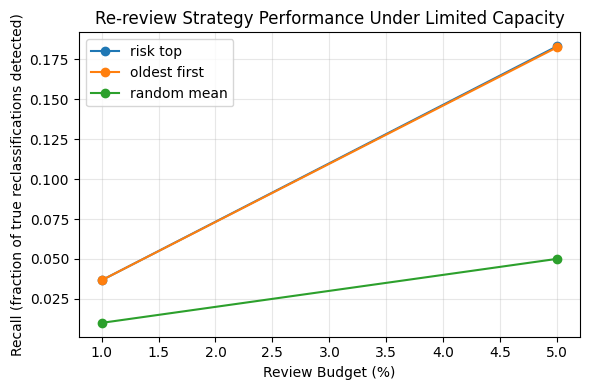

'../figures/review_strategy_recall_curve.png'

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

for strategy in ["risk_top", "oldest_first", "random_mean"]:
    sub = review_comp[review_comp["strategy"] == strategy]
    plt.plot(
        sub["budget"] * 100,
        sub["recall"],
        marker="o",
        label=strategy.replace("_", " ")
    )

plt.xlabel("Review Budget (%)")
plt.ylabel("Recall (fraction of true reclassifications detected)")
plt.title("Re-review Strategy Performance Under Limited Capacity")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()

out_fig = "../figures/review_strategy_recall_curve.png"
plt.savefig(out_fig, dpi=300)
plt.show()

out_fig


In [20]:
import pandas as pd
import numpy as np

analysis_path = "../outputs/tables/analysis_df.csv.gz"
analysis_df = pd.read_csv(analysis_path)

analysis_df.shape, analysis_df["ClinSigSimple"].value_counts().head(10)


((300000, 15),
 ClinSigSimple
  0    185303
  1    114146
 -1       551
 Name: count, dtype: int64)

In [21]:
# Map ClinSigSimple to interpretable class labels (no relabeling of values)
class_map = {
    1: "Pathogenic_or_LikelyPathogenic",
    0: "VUS_or_Benign",
    -1: "Conflicting_or_Other"
}

analysis_df["ClinSigClass"] = analysis_df["ClinSigSimple"].map(class_map)

analysis_df["ClinSigClass"].value_counts()


ClinSigClass
VUS_or_Benign                     185303
Pathogenic_or_LikelyPathogenic    114146
Conflicting_or_Other                 551
Name: count, dtype: int64

In [22]:
drivers = [
    "years_since_review",
    "NumberSubmitters_num",
    "ConfidenceLevel_num",
    "conflicting",
    "y"
]

class_summary = (
    analysis_df
    .groupby("ClinSigClass")[drivers]
    .agg(
        years_since_review_median=("years_since_review", "median"),
        submitters_median=("NumberSubmitters_num", "median"),
        confidence_median=("ConfidenceLevel_num", "median"),
        conflicting_rate=("conflicting", "mean"),
        instability_rate=("y", "mean"),
        n=("y", "size")
    )
    .reset_index()
)

class_summary


KeyError: "Columns not found: 'ConfidenceLevel_num'"

In [23]:
# Recreate ConfidenceLevel_num (same encoding as Option 1)
conf_map = {
    "Low": 1,
    "Unknown": 1,
    "Medium": 2,
    "Moderate": 2,
    "High": 3
}

analysis_df["ConfidenceLevel_num"] = analysis_df["ConfidenceLevel"].map(conf_map)

analysis_df["ConfidenceLevel"].value_counts(), analysis_df["ConfidenceLevel_num"].isna().mean()


(ConfidenceLevel
 High       131546
 Unknown     65643
 Low         53235
 Medium      49576
 Name: count, dtype: int64,
 np.float64(0.0))

In [24]:
drivers = [
    "years_since_review",
    "NumberSubmitters_num",
    "ConfidenceLevel_num",
    "conflicting",
    "y"
]

class_summary = (
    analysis_df
    .groupby("ClinSigClass")[drivers]
    .agg(
        years_since_review_median=("years_since_review", "median"),
        submitters_median=("NumberSubmitters_num", "median"),
        confidence_median=("ConfidenceLevel_num", "median"),
        conflicting_rate=("conflicting", "mean"),
        instability_rate=("y", "mean"),
        n=("y", "size")
    )
    .reset_index()
)

class_summary


,ClinSigClass,years_since_review_median,submitters_median,confidence_median,conflicting_rate,instability_rate,n
0,Conflicting_or_Other,NaN,0.0,1.0,0.000000,0.000000,551
1,Pathogenic_or_LikelyPathogenic,3.693361,2.0,2.0,0.096561,0.361975,114146
2,VUS_or_Benign,1.221081,3.0,2.0,0.229446,0.225846,185303


In [25]:
out_csv = "../outputs/tables/reclassification_transition_summary.csv"
class_summary.to_csv(out_csv, index=False)
out_csv


'../outputs/tables/reclassification_transition_summary.csv'

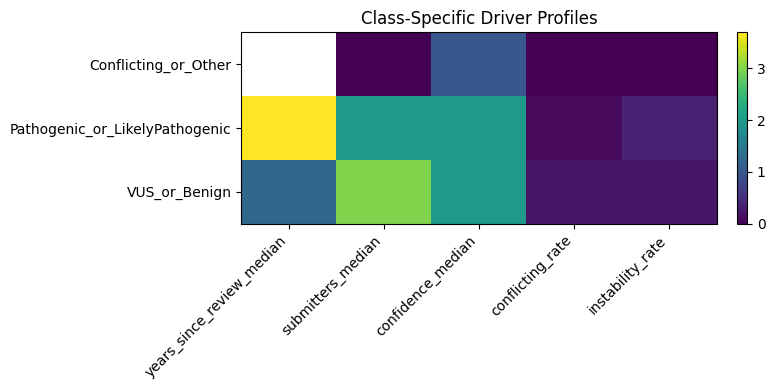

'../figures/transition_specific_driver_heatmap.png'

In [26]:
import matplotlib.pyplot as plt

# Prepare data for heatmap-style plot
heat_df = class_summary.set_index("ClinSigClass")[
    [
        "years_since_review_median",
        "submitters_median",
        "confidence_median",
        "conflicting_rate",
        "instability_rate",
    ]
]

plt.figure(figsize=(8, 4))
im = plt.imshow(heat_df, aspect="auto")

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.yticks(range(len(heat_df.index)), heat_df.index)
plt.xticks(range(len(heat_df.columns)), heat_df.columns, rotation=45, ha="right")

plt.title("Class-Specific Driver Profiles")
plt.tight_layout()

out_fig = "../figures/transition_specific_driver_heatmap.png"
plt.savefig(out_fig, dpi=300)
plt.show()

out_fig
